# LAB 2 

### Exercise:

### 1) Perform all data preprocessing tasks and feature selection on “Exercise-CarData.csv”

In [1]:

# Import Libraries

import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder


In [2]:

# Load Data
# Replace "?,??,???....." to "NaN"
# Replace Doors value from string to corresponding numbers
# Convert Doors feature from object to int4

datasets = pd.read_csv('/home/nihar/Desktop/ML/Lab2/Exercise-CarData.csv',sep=',\?*',engine='python')

numbers = { 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9,
            '1': 1, '2': 2,'3': 3, '4':4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9 }
datasets.Doors = [numbers[item] for item in datasets.Doors]

datasets['Doors'] = pd.to_numeric(datasets['Doors'],errors='ignore')

print("\nData :\n",datasets.iloc[0:10,1:11])



Data :
    Price   Age       KM FuelType     HP  MetColor  Automatic    CC  Doors  \
0  13500  23.0  46986.0   Diesel   90.0       1.0          0  2000      3   
1  13750  23.0  72937.0   Diesel   90.0       1.0          0  2000      3   
2  13950  24.0  41711.0   Diesel   90.0       NaN          0  2000      3   
3  14950  26.0  48000.0   Diesel   90.0       0.0          0  2000      3   
4  13750  30.0  38500.0   Diesel   90.0       0.0          0  2000      3   
5  12950  32.0  61000.0   Diesel   90.0       0.0          0  2000      3   
6  16900  27.0      NaN   Diesel    NaN       NaN          0  2000      3   
7  18600  30.0  75889.0      NaN   90.0       1.0          0  2000      3   
8  21500  27.0  19700.0   Petrol  192.0       0.0          0  1800      3   
9  12950  23.0  71138.0   Diesel    NaN       NaN          0  1900      3   

   Weight  
0    1165  
1    1165  
2    1165  
3    1165  
4    1170  
5    1170  
6    1245  
7    1245  
8    1185  
9    1105  


In [3]:

# Statistics

print("\nData statistics :\n\n",datasets.describe())
print ("\n\nDataTypes of Features :\n\n",datasets.dtypes)
print("\n")
datasets.info()



Data statistics :

         Unnamed: 0         Price          Age             KM           HP  \
count  1436.000000   1436.000000  1336.000000    1421.000000  1430.000000   
mean    717.500000  10730.824513    55.672156   68647.239972   101.478322   
std     414.681806   3626.964585    18.589804   37333.023589    14.768255   
min       0.000000   4350.000000     1.000000       1.000000    69.000000   
25%     358.750000   8450.000000    43.000000   43210.000000    90.000000   
50%     717.500000   9900.000000    60.000000   63634.000000   110.000000   
75%    1076.250000  11950.000000    70.000000   87000.000000   110.000000   
max    1435.000000  32500.000000    80.000000  243000.000000   192.000000   

          MetColor    Automatic           CC        Doors      Weight  
count  1286.000000  1436.000000  1436.000000  1436.000000  1436.00000  
mean      0.674961     0.055710  1566.827994     4.033426  1072.45961  
std       0.468572     0.229441   187.182436     0.952677    52.64112

### a) Data Transformation 

In [4]:

# Create Data for Transformation
# Replace "Nan" with 0
# Replace FuelType with "NaN"

datasets = datasets.replace(np.nan, 0, regex=True)
X_new = datasets
X_new['FuelType'] = pd.to_numeric(X_new['FuelType'],errors='coerce')
X_new=X_new.values
print("\nData for transformation : \n\n", X_new[0:5,:])



Data for transformation : 

 [[0.0000e+00 1.3500e+04 2.3000e+01 4.6986e+04        nan 9.0000e+01
  1.0000e+00 0.0000e+00 2.0000e+03 3.0000e+00 1.1650e+03]
 [1.0000e+00 1.3750e+04 2.3000e+01 7.2937e+04        nan 9.0000e+01
  1.0000e+00 0.0000e+00 2.0000e+03 3.0000e+00 1.1650e+03]
 [2.0000e+00 1.3950e+04 2.4000e+01 4.1711e+04        nan 9.0000e+01
  0.0000e+00 0.0000e+00 2.0000e+03 3.0000e+00 1.1650e+03]
 [3.0000e+00 1.4950e+04 2.6000e+01 4.8000e+04        nan 9.0000e+01
  0.0000e+00 0.0000e+00 2.0000e+03 3.0000e+00 1.1650e+03]
 [4.0000e+00 1.3750e+04 3.0000e+01 3.8500e+04        nan 9.0000e+01
  0.0000e+00 0.0000e+00 2.0000e+03 3.0000e+00 1.1700e+03]]


In [5]:

# Perform scaling on Data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new)
print("\nScaled Data : \n\n", X_scaled[0:5,:])



Scaled Data : 

 [[0.00000000e+00 3.25044405e-01 2.87500000e-01 1.93358025e-01
             nan 4.68750000e-01 1.00000000e+00 0.00000000e+00
  1.00000000e+00 3.33333333e-01 2.68292683e-01]
 [6.96864111e-04 3.33925400e-01 2.87500000e-01 3.00152263e-01
             nan 4.68750000e-01 1.00000000e+00 0.00000000e+00
  1.00000000e+00 3.33333333e-01 2.68292683e-01]
 [1.39372822e-03 3.41030195e-01 3.00000000e-01 1.71650206e-01
             nan 4.68750000e-01 0.00000000e+00 0.00000000e+00
  1.00000000e+00 3.33333333e-01 2.68292683e-01]
 [2.09059233e-03 3.76554174e-01 3.25000000e-01 1.97530864e-01
             nan 4.68750000e-01 0.00000000e+00 0.00000000e+00
  1.00000000e+00 3.33333333e-01 2.68292683e-01]
 [2.78745645e-03 3.33925400e-01 3.75000000e-01 1.58436214e-01
             nan 4.68750000e-01 0.00000000e+00 0.00000000e+00
  1.00000000e+00 3.33333333e-01 2.76422764e-01]]


In [6]:

# Perform standardization on Data

std = StandardScaler()
X_std = std.fit_transform(X_new)
print("\nStandardized Data : \n\n", X_std[0:5,:])



Standardized Data : 

 [[-1.73084506  0.76376268 -1.26023883 -0.55444821         nan -0.68571051
   0.80893626 -0.24289308  2.31497633 -1.08513865  1.75856113]
 [-1.72843274  0.83271485 -1.26023883  0.1325441          nan -0.68571051
   0.80893626 -0.24289308  2.31497633 -1.08513865  1.75856113]
 [-1.72602041  0.88787659 -1.21647334 -0.69409155         nan -0.68571051
  -1.23619133 -0.24289308  2.31497633 -1.08513865  1.75856113]
 [-1.72360808  1.16368529 -1.12894236 -0.52760492         nan -0.68571051
  -1.23619133 -0.24289308  2.31497633 -1.08513865  1.75856113]
 [-1.72119575  0.83271485 -0.95388041 -0.7790953          nan -0.68571051
  -1.23619133 -0.24289308  2.31497633 -1.08513865  1.853577  ]]


### b) Handling Categorical Data 

In [7]:

# Load Data
# Replace "?,??,???....." to "NaN"
# Replace Doors value from string to corresponding numbers
# Convert Doors feature from object to int64
# Replace FuelType from "NaN" to "Unknown"

datasets = pd.read_csv('/home/nihar/Desktop/ML/Lab2/Exercise-CarData.csv',sep=',\?*',engine='python')
datasets.Doors = [numbers[item] for item in datasets.Doors]
datasets['Doors'] = pd.to_numeric(datasets['Doors'],errors='coerce')
datasets['FuelType'] = datasets['FuelType'].replace(np.nan, 'Unknown', regex=True)
X_new = datasets.values
print("\nData for LabelEncoder : \n\n", X_new[0:10,:])



Data for LabelEncoder : 

 [[0 13500 23.0 46986.0 'Diesel' 90.0 1.0 0 2000 3 1165]
 [1 13750 23.0 72937.0 'Diesel' 90.0 1.0 0 2000 3 1165]
 [2 13950 24.0 41711.0 'Diesel' 90.0 nan 0 2000 3 1165]
 [3 14950 26.0 48000.0 'Diesel' 90.0 0.0 0 2000 3 1165]
 [4 13750 30.0 38500.0 'Diesel' 90.0 0.0 0 2000 3 1170]
 [5 12950 32.0 61000.0 'Diesel' 90.0 0.0 0 2000 3 1170]
 [6 16900 27.0 nan 'Diesel' nan nan 0 2000 3 1245]
 [7 18600 30.0 75889.0 'Unknown' 90.0 1.0 0 2000 3 1245]
 [8 21500 27.0 19700.0 'Petrol' 192.0 0.0 0 1800 3 1185]
 [9 12950 23.0 71138.0 'Diesel' nan nan 0 1900 3 1105]]


In [8]:

# Convert FuelType into Numeric values

le = LabelEncoder()
X_new[ : ,4] = le.fit_transform(X_new[ : ,4])
print("\nNumeric FuelType : \n\n", X_new[0:100,4]) 



Numeric FuelType : 

 [1 1 1 1 1 1 1 3 2 1 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 3 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 3 1 1 2 1 2 1 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 2 1 2 1 1 2 2 1 2 2 2 2]


In [9]:

# Create one column for each FuelType

dummy = pd.get_dummies(datasets['FuelType'])
print("\n\nDummy :\n",dummy.iloc[0:10,:])
datasets = datasets.drop(['FuelType'],axis=1)
datasets = pd.concat([dummy,datasets],axis=1)
print("\n\nFinal Data :\n",datasets.iloc[0:17,:])




Dummy :
    CNG  Diesel  Petrol  Unknown
0    0       1       0        0
1    0       1       0        0
2    0       1       0        0
3    0       1       0        0
4    0       1       0        0
5    0       1       0        0
6    0       1       0        0
7    0       0       0        1
8    0       0       1        0
9    0       1       0        0


Final Data :
     CNG  Diesel  Petrol  Unknown  Unnamed: 0  Price   Age       KM     HP  \
0     0       1       0        0           0  13500  23.0  46986.0   90.0   
1     0       1       0        0           1  13750  23.0  72937.0   90.0   
2     0       1       0        0           2  13950  24.0  41711.0   90.0   
3     0       1       0        0           3  14950  26.0  48000.0   90.0   
4     0       1       0        0           4  13750  30.0  38500.0   90.0   
5     0       1       0        0           5  12950  32.0  61000.0   90.0   
6     0       1       0        0           6  16900  27.0      NaN    NaN   
7    

### c) Handling the missing value

In [10]:

# Load Data
# Replace "?,??,???....." to "NaN"
# Replace Doors value from string to corresponding numbers
# Convert Doors feature from object to int64

datasets = pd.read_csv('/home/nihar/Desktop/ML/Lab2/Exercise-CarData.csv',sep=',\?*',engine='python')
datasets.Doors = [numbers[item] for item in datasets.Doors]
datasets['Doors'] = pd.to_numeric(datasets['Doors'],errors='coerce')
X_new = datasets.values
print("\nData for LabelEncoder : \n\n", X_new[0:10,:])



Data for LabelEncoder : 

 [[0 13500 23.0 46986.0 'Diesel' 90.0 1.0 0 2000 3 1165]
 [1 13750 23.0 72937.0 'Diesel' 90.0 1.0 0 2000 3 1165]
 [2 13950 24.0 41711.0 'Diesel' 90.0 nan 0 2000 3 1165]
 [3 14950 26.0 48000.0 'Diesel' 90.0 0.0 0 2000 3 1165]
 [4 13750 30.0 38500.0 'Diesel' 90.0 0.0 0 2000 3 1170]
 [5 12950 32.0 61000.0 'Diesel' 90.0 0.0 0 2000 3 1170]
 [6 16900 27.0 nan 'Diesel' nan nan 0 2000 3 1245]
 [7 18600 30.0 75889.0 nan 90.0 1.0 0 2000 3 1245]
 [8 21500 27.0 19700.0 'Petrol' 192.0 0.0 0 1800 3 1185]
 [9 12950 23.0 71138.0 'Diesel' nan nan 0 1900 3 1105]]


In [11]:

# Removing the row with all null values

datasets.dropna(how='all',inplace=True)
print("\nNew Data :\n\n",datasets.iloc[0:10,1:11])



New Data :

    Price   Age       KM FuelType     HP  MetColor  Automatic    CC  Doors  \
0  13500  23.0  46986.0   Diesel   90.0       1.0          0  2000      3   
1  13750  23.0  72937.0   Diesel   90.0       1.0          0  2000      3   
2  13950  24.0  41711.0   Diesel   90.0       NaN          0  2000      3   
3  14950  26.0  48000.0   Diesel   90.0       0.0          0  2000      3   
4  13750  30.0  38500.0   Diesel   90.0       0.0          0  2000      3   
5  12950  32.0  61000.0   Diesel   90.0       0.0          0  2000      3   
6  16900  27.0      NaN   Diesel    NaN       NaN          0  2000      3   
7  18600  30.0  75889.0      NaN   90.0       1.0          0  2000      3   
8  21500  27.0  19700.0   Petrol  192.0       0.0          0  1800      3   
9  12950  23.0  71138.0   Diesel    NaN       NaN          0  1900      3   

   Weight  
0    1165  
1    1165  
2    1165  
3    1165  
4    1170  
5    1170  
6    1245  
7    1245  
8    1185  
9    1105  


In [12]:

# Imputation (Replacing null values with mean value of that attribute)

# Using Imputer function to replace NaN values with mean of that parameter value 
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")

# Fitting the data, function learns the stats 
imputer = imputer.fit(X_new[:,[0,1,2,3,5,6,7,8,9,10]]) 
  
# fit_transform() will execute those stats on the input ie. X[:, 1:3] 
X_new[:,[0,1,2,3,5,6,7,8,9,10]] = imputer.transform(X_new[:,[0,1,2,3,5,6,7,8,9,10]]) 
  
# filling the missing value with mean 
print("\n\nNew Data with Mean Value for NaN : \n\n", X_new[0:10,:])




New Data with Mean Value for NaN : 

 [[0.0 13500.0 23.0 46986.0 'Diesel' 90.0 1.0 0.0 2000.0 3.0 1165.0]
 [1.0 13750.0 23.0 72937.0 'Diesel' 90.0 1.0 0.0 2000.0 3.0 1165.0]
 [2.0 13950.0 24.0 41711.0 'Diesel' 90.0 0.6749611197511665 0.0 2000.0
  3.0 1165.0]
 [3.0 14950.0 26.0 48000.0 'Diesel' 90.0 0.0 0.0 2000.0 3.0 1165.0]
 [4.0 13750.0 30.0 38500.0 'Diesel' 90.0 0.0 0.0 2000.0 3.0 1170.0]
 [5.0 12950.0 32.0 61000.0 'Diesel' 90.0 0.0 0.0 2000.0 3.0 1170.0]
 [6.0 16900.0 27.0 68647.23997185081 'Diesel' 101.47832167832168
  0.6749611197511665 0.0 2000.0 3.0 1245.0]
 [7.0 18600.0 30.0 75889.0 nan 90.0 1.0 0.0 2000.0 3.0 1245.0]
 [8.0 21500.0 27.0 19700.0 'Petrol' 192.0 0.0 0.0 1800.0 3.0 1185.0]
 [9.0 12950.0 23.0 71138.0 'Diesel' 101.47832167832168 0.6749611197511665
  0.0 1900.0 3.0 1105.0]]


### d) Correlation 

In [13]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1421 non-null   float64
 4   FuelType    1336 non-null   object 
 5   HP          1430 non-null   float64
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   int64  
 10  Weight      1436 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 134.6+ KB


In [14]:

# Selecting features based on correlation
# Generating the correlation matrix

corr = datasets.iloc[:,1:11].corr()
corr.head(10)


,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Price,1.000000,-0.878407,-0.574720,0.309902,0.112041,0.033081,0.165067,0.185326,0.581198
Age,-0.878407,1.000000,0.512735,-0.157904,-0.099659,0.032573,-0.120706,-0.157027,-0.464299
KM,-0.574720,0.512735,1.000000,-0.335285,-0.093825,-0.081248,0.299993,-0.036191,-0.026271
HP,0.309902,-0.157904,-0.335285,1.000000,0.064749,0.013755,0.053758,0.097162,0.086737
MetColor,0.112041,-0.099659,-0.093825,0.064749,1.000000,-0.013973,0.029189,0.086203,0.057142
Automatic,0.033081,0.032573,-0.081248,0.013755,-0.013973,1.000000,-0.069321,-0.027654,0.057249
CC,0.165067,-0.120706,0.299993,0.053758,0.029189,-0.069321,1.000000,0.126768,0.651450
Doors,0.185326,-0.157027,-0.036191,0.097162,0.086203,-0.027654,0.126768,1.000000,0.302618
Weight,0.581198,-0.464299,-0.026271,0.086737,0.057142,0.057249,0.651450,0.302618,1.000000


<AxesSubplot:>

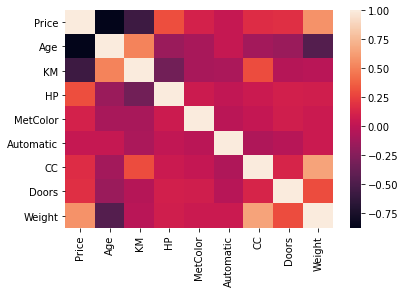

In [15]:

# Generating the correlation heatmap

sns.heatmap(corr)


In [16]:

# Comparing the correlation between features and remove one of two features that have a correlation higher than 0.9

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
selected_columns = datasets.iloc[:,[1,2,3,5,6,7,8,9,10]].columns[columns]
selected_columns.shape


(9,)

In [17]:

datasets = pd.concat([datasets['FuelType'],datasets[selected_columns]],axis=1)
print(datasets.iloc[0:10,:])


  FuelType  Price   Age       KM     HP  MetColor  Automatic    CC  Doors  \
0   Diesel  13500  23.0  46986.0   90.0       1.0          0  2000      3   
1   Diesel  13750  23.0  72937.0   90.0       1.0          0  2000      3   
2   Diesel  13950  24.0  41711.0   90.0       NaN          0  2000      3   
3   Diesel  14950  26.0  48000.0   90.0       0.0          0  2000      3   
4   Diesel  13750  30.0  38500.0   90.0       0.0          0  2000      3   
5   Diesel  12950  32.0  61000.0   90.0       0.0          0  2000      3   
6   Diesel  16900  27.0      NaN    NaN       NaN          0  2000      3   
7      NaN  18600  30.0  75889.0   90.0       1.0          0  2000      3   
8   Petrol  21500  27.0  19700.0  192.0       0.0          0  1800      3   
9   Diesel  12950  23.0  71138.0    NaN       NaN          0  1900      3   

   Weight  
0    1165  
1    1165  
2    1165  
3    1165  
4    1170  
5    1170  
6    1245  
7    1245  
8    1185  
9    1105  
